## Data sources

* World population prospects - Population Division - United Nations - download from https://population.un.org/wpp/Download/Standard/CSV/ on 2020-03-26 - as WPP2019_TotalPopulationBySex.csv
* COVID-19 case data from tableau - downloaded from https://www.tableau.com/covid-19-coronavirus-data-resources on 2020-03-26 - as COVID-19 Cases.csv

## AIM

I aim to test how demographic information relates to diffusion rate of COVID-19.

In [18]:
#import sys
#!{sys.executable} -m pip install pandas matplotlib


# Read and Inspect Data

Summary of the "COVID-19 Cases"


In [54]:
import pandas as pd

df = pd.read_csv("COVID-19 Cases.csv", parse_dates=['Date'])

df.sort_values(['Date', 'Cases'], ascending = [False, False], inplace=True)

print('\n')
print('Data is of dimension:', df.shape)
      
display(df.head())

print('\n')
display(df.info())
      
df.describe()




Data is of dimension: (36460, 11)


,Country_Region,Case_Type,Date,Cases,Table Names,Difference,Prep_Flow_Runtime,Latest_Date,Province_State,Lat,Long
15819,Italy,Confirmed,2020-03-24,69176,Time Series,5249,3/25/2020 3:38:52 PM,3/24/2020,NaN,43.000000,12.000000
30329,China,Confirmed,2020-03-24,67801,Time Series,1,3/25/2020 3:38:52 PM,3/24/2020,Hubei,30.975600,112.270700
28965,Spain,Confirmed,2020-03-24,39885,Time Series,4749,3/25/2020 3:38:52 PM,3/24/2020,NaN,40.000000,-4.000000
22641,Germany,Confirmed,2020-03-24,32986,Time Series,3930,3/25/2020 3:38:52 PM,3/24/2020,NaN,51.000000,9.000000
2482,US,Confirmed,2020-03-24,25681,Daily Summary,4797,3/25/2020 3:38:52 PM,3/24/2020,New York,41.459987,-73.894288




<class 'pandas.core.frame.DataFrame'>
Int64Index: 36460 entries, 15819 to 36459
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country_Region     36460 non-null  object        
 1   Case_Type          36460 non-null  object        
 2   Date               36460 non-null  datetime64[ns]
 3   Cases              36460 non-null  int64         
 4   Table Names        36460 non-null  object        
 5   Difference         36460 non-null  int64         
 6   Prep_Flow_Runtime  36460 non-null  object        
 7   Latest_Date        36460 non-null  object        
 8   Province_State     15876 non-null  object        
 9   Lat                36456 non-null  float64       
 10  Long               36456 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 3.3+ MB


None

,Cases,Difference,Lat,Long
count,36460.000000,36460.000000,36456.000000,36456.000000
mean,170.313083,11.976111,24.836425,5.553049
std,2489.888826,174.076772,23.347322,79.030285
min,0.000000,-62.000000,-41.454500,-157.678350
25%,0.000000,0.000000,12.169600,-70.162700
50%,0.000000,0.000000,31.101000,10.470400
75%,1.000000,0.000000,41.784550,57.500000
max,69176.000000,14840.000000,71.706900,178.065000


# Validate data 

I saw duplicate in previous versions of COVID-19 data. Check if this is still the case.

In [21]:
df[(df['Date'] == '2020-03-24') & (df['Province_State'] == 'California')]

,Country_Region,Case_Type,Date,Cases,Table Names,Difference,Prep_Flow_Runtime,Latest_Date,Province_State,Lat,Long
4216,US,Confirmed,2020-03-24,2538,Daily Summary,430,3/25/2020 3:38:52 PM,3/24/2020,California,37.209448,-120.860122
4217,US,Deaths,2020-03-24,50,Daily Summary,11,3/25/2020 3:38:52 PM,3/24/2020,California,37.209448,-120.860122


# Explore data

Scatter plot of all corona cases, confirmed and death

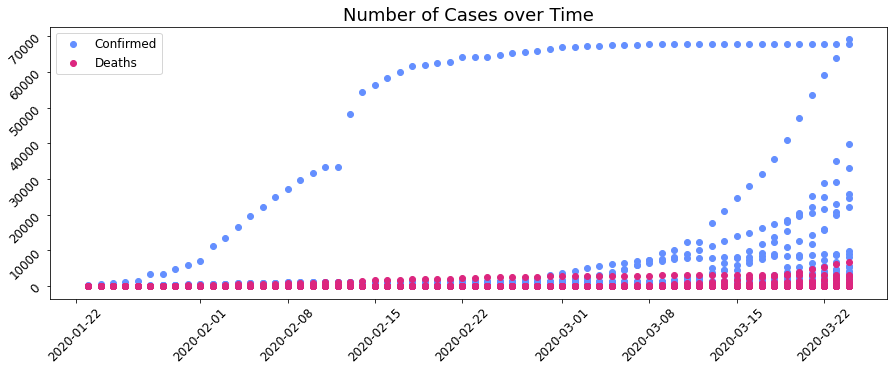

In [22]:
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn')

plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)

df_Confirmed = df[df['Case_Type'] == 'Confirmed'] 
df_Deaths = df[df['Case_Type'] == 'Deaths'] 

#plt.xlim(datetime.datetime(2020, 2, 24), datetime.datetime(2020, 3, 24))
plt.title("Number of Cases over Time", fontsize=18)

plt.scatter(df_Confirmed['Date'], df_Confirmed['Cases'], color='#648FFF', label='Confirmed')
plt.scatter(df_Deaths['Date'], df_Deaths['Cases'], color='#DC267F', label='Deaths')

plt.legend(fontsize=12)
plt.show()



# Select most affected countries on 2020-03-24

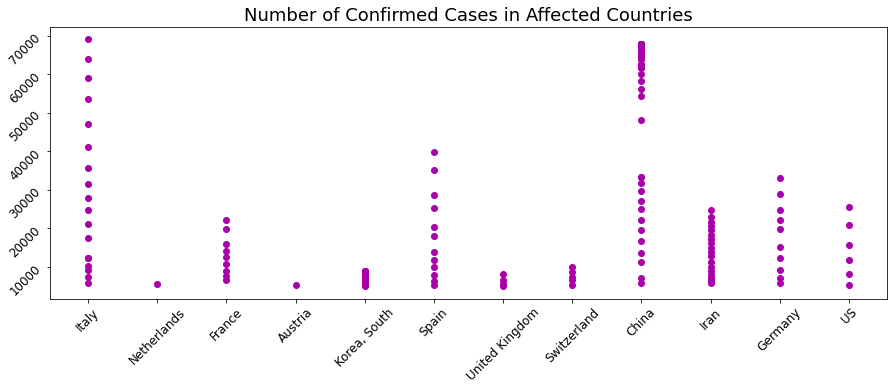

In [23]:

plt.title("Number of Confirmed Cases in Affected Countries", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.rcParams["figure.figsize"] = (15,5)

df_ma = df[(df["Cases"] > 5000) & (df['Case_Type'] == 'Confirmed')]

plt.scatter(df_ma['Country_Region'], df_ma['Cases'], color='#AA00AA')
plt.show()


China, Italy, Spain, Germany, and Iran seem to be the worst. Plot them over time

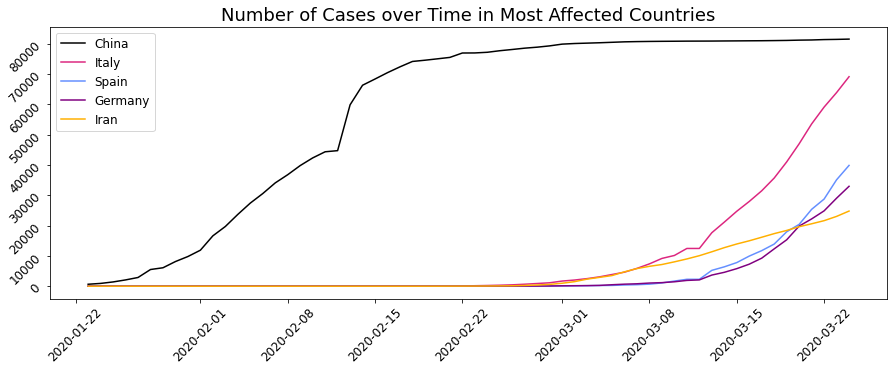

In [27]:

plt.title("Number of Cases over Time in Most Affected Countries", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.rcParams["figure.figsize"] = (15,5)


df_China = df[(df["Country_Region"] == 'China') & (df['Case_Type'] == 'Confirmed')]

dates = df_China['Date'].unique()
agg_cases = []

for d in dates:
    agg_cases_per_date = df_China[(df_China['Date'] == d)].Cases.agg(sum)
    agg_cases.append(agg_cases_per_date)

plt.plot(dates, agg_cases, color='#000000', label='China')
#plt.show()

df_Italy = df[(df["Country_Region"] == 'Italy') & (df['Case_Type'] == 'Confirmed')]
plt.plot(df_Italy['Date'], df_Italy['Cases'], color='#DC267F', label='Italy')
#plt.show()

df_Spain = df[(df["Country_Region"] == 'Spain') & (df['Case_Type'] == 'Confirmed')]
plt.plot(df_Spain['Date'], df_Spain['Cases'], color='#648FFF', label='Spain')
#plt.show()

df_Germany = df[(df["Country_Region"] == 'Germany') & (df['Case_Type'] == 'Confirmed')]
plt.plot(df_Germany['Date'], df_Germany['Cases'], color='#800080', label='Germany')
#plt.show()

df_Iran = df[(df["Country_Region"] == 'Iran') & (df['Case_Type'] == 'Confirmed')]
plt.plot(df_Iran['Date'], df_Iran['Cases'], color='#FFB000', label='Iran')
#plt.show()

plt.legend(fontsize=12)
plt.show()




# Growth Rate of Covid-19 in above countries


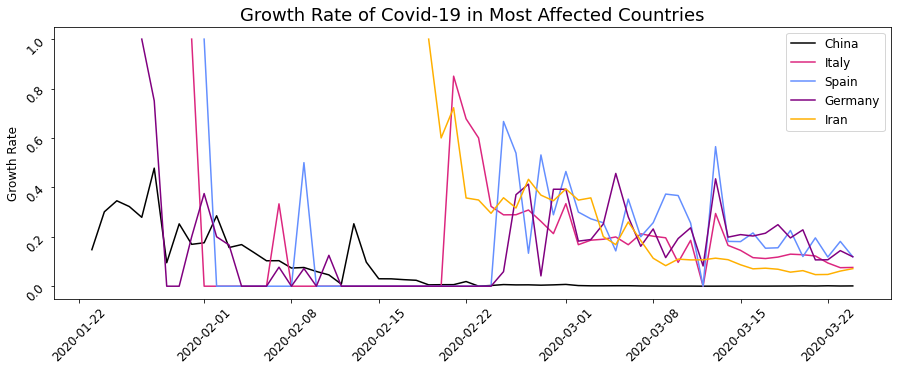

In [26]:

plt.title("Growth Rate of Covid-19 in Most Affected Countries", fontsize=18)
plt.ylabel('Growth Rate', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.rcParams["figure.figsize"] = (15,5)


GR_China = []
dates = df_China['Date'].unique()

for d in dates:
    differences_per_date = df_China[(df_China['Date'] == d)].Difference.agg(sum)
    cases_per_date = df_China[(df_China['Date'] == d)].Cases.agg(sum)
    GR_China.append(differences_per_date / cases_per_date)
    
plt.plot(dates, GR_China, color='#000000', label='China')

GR_Italy = df_Italy['Difference'] / df_Italy['Cases']
plt.plot(df_Italy['Date'], GR_Italy, color='#DC267F', label='Italy')

GR_Spain = df_Spain['Difference'] / df_Spain['Cases']
plt.plot(df_Italy['Date'], GR_Spain, color='#648FFF', label='Spain')

GR_Germany = df_Germany['Difference'] / df_Germany['Cases']
plt.plot(df_Germany['Date'], GR_Germany, color='#800080', label='Germany')

GR_Iran = df_Iran['Difference'] / df_Iran['Cases']
plt.plot(df_Iran['Date'], GR_Iran, color='#FFB000', label='Iran')

plt.legend(fontsize=12)
plt.show()




# Demography Data from the UN

look at the population density in 2020

In [74]:
import pandas as pd
df_demography = pd.read_csv('WPP2019_TotalPopulationBySex.csv')
df_demography = df_demography[(df_demography['Time'] == 2020) & (df_demography['Variant'] == 'Medium')]

df_demography


,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
70,4,Afghanistan,2,Medium,2020,2020.5,19976.265,18952.076,38928.341,59.627
954,903,Africa,2,Medium,2020,2020.5,669878.340,670719.773,1340598.113,45.216
1838,1823,African Group,2,Medium,2020,2020.5,668995.562,669831.029,1338826.591,45.571
1989,1560,African Union,2,Medium,2020,2020.5,669307.822,670116.099,1339423.921,45.182
2140,2080,African Union: Central Africa,2,Medium,2020,2020.5,79260.910,79358.728,158619.638,30.066
...,...,...,...,...,...,...,...,...,...,...
277315,900,World,2,Medium,2020,2020.5,3929973.953,3864824.776,7794798.729,59.917
278199,1801,World Bank Regional Groups (developing only),2,Medium,2020,2020.5,3299567.992,3229194.235,6528762.227,71.088
278350,887,Yemen,2,Medium,2020,2020.5,15024.985,14800.983,29825.968,56.492
279234,894,Zambia,2,Medium,2020,2020.5,9103.006,9280.950,18383.956,24.730


In [16]:
print('\n')
df_demography.info()
df_demography.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 70 to 280118
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LocID       477 non-null    int64  
 1   Location    477 non-null    object 
 2   VarID       477 non-null    int64  
 3   Variant     477 non-null    object 
 4   Time        477 non-null    int64  
 5   MidPeriod   477 non-null    float64
 6   PopMale     443 non-null    float64
 7   PopFemale   443 non-null    float64
 8   PopTotal    477 non-null    float64
 9   PopDensity  477 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 41.0+ KB


,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,477.000000,477.0,477.0,477.0,4.430000e+02,4.430000e+02,4.770000e+02,477.000000
mean,1034.761006,2.0,2020.0,2020.5,3.528683e+05,3.458472e+05,6.489142e+05,275.147916
std,723.281616,0.0,0.0,0.0,7.252082e+05,7.049174e+05,1.389731e+06,1649.342252
min,4.000000,2.0,2020.0,2020.5,4.726900e+01,4.790100e+01,8.090000e-01,0.138000
25%,446.000000,2.0,2020.0,2020.5,4.300882e+03,4.354197e+03,5.057677e+03,31.143000
50%,903.000000,2.0,2020.0,2020.5,3.621794e+04,3.574911e+04,5.088288e+04,64.006000
75%,1586.000000,2.0,2020.0,2020.5,3.187166e+05,3.291524e+05,5.750446e+05,147.464000
max,5501.000000,2.0,2020.0,2020.5,3.929974e+06,3.864825e+06,7.794799e+06,26338.255000
